In [1]:
%matplotlib inline

In [2]:
import numpy as np
import yt
import astropy

In [3]:
@yt.derived_field(name = "positive_intensity", units = "Jy/beam")
def positive_intensity(field, data):
    tr = data["intensity"].copy()
    np.maximum(tr, 0.0, tr)
    return tr

In [4]:
ds = yt.load("data/NGC5633/NGC5633.co.cmnorm.fits", nan_mask = 0.0)

In [5]:
ds.fields.fits.intensity.units

'Jy/beam'


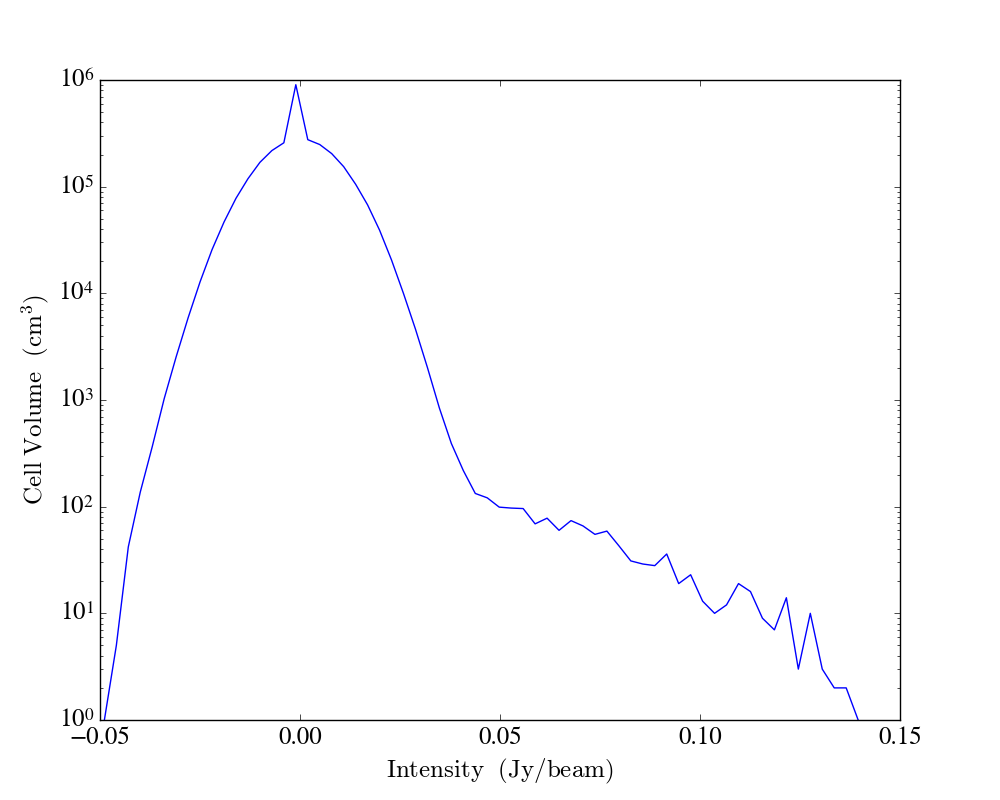

In [6]:
dd = ds.r[:]
p = yt.ProfilePlot(dd, "intensity", "cell_volume", weight_field=None)
p.show()

In [14]:
ds.domain_right_edge

YTArray([ 263.5,  257.5,   44.5]) code_length


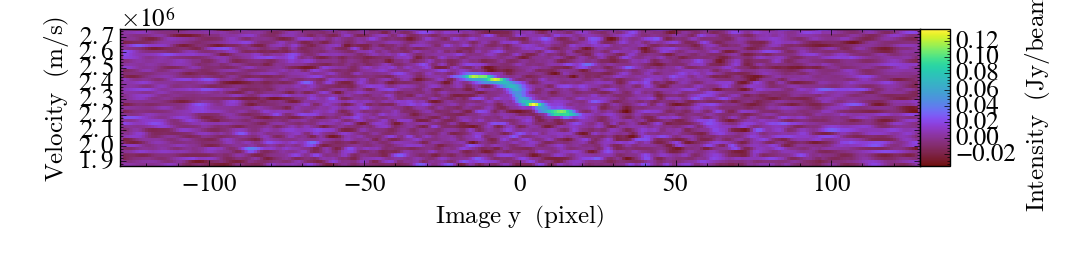

In [16]:
p = yt.SlicePlot(ds, "x", "intensity")
p.show()

In [17]:
from ipywidgets import interact


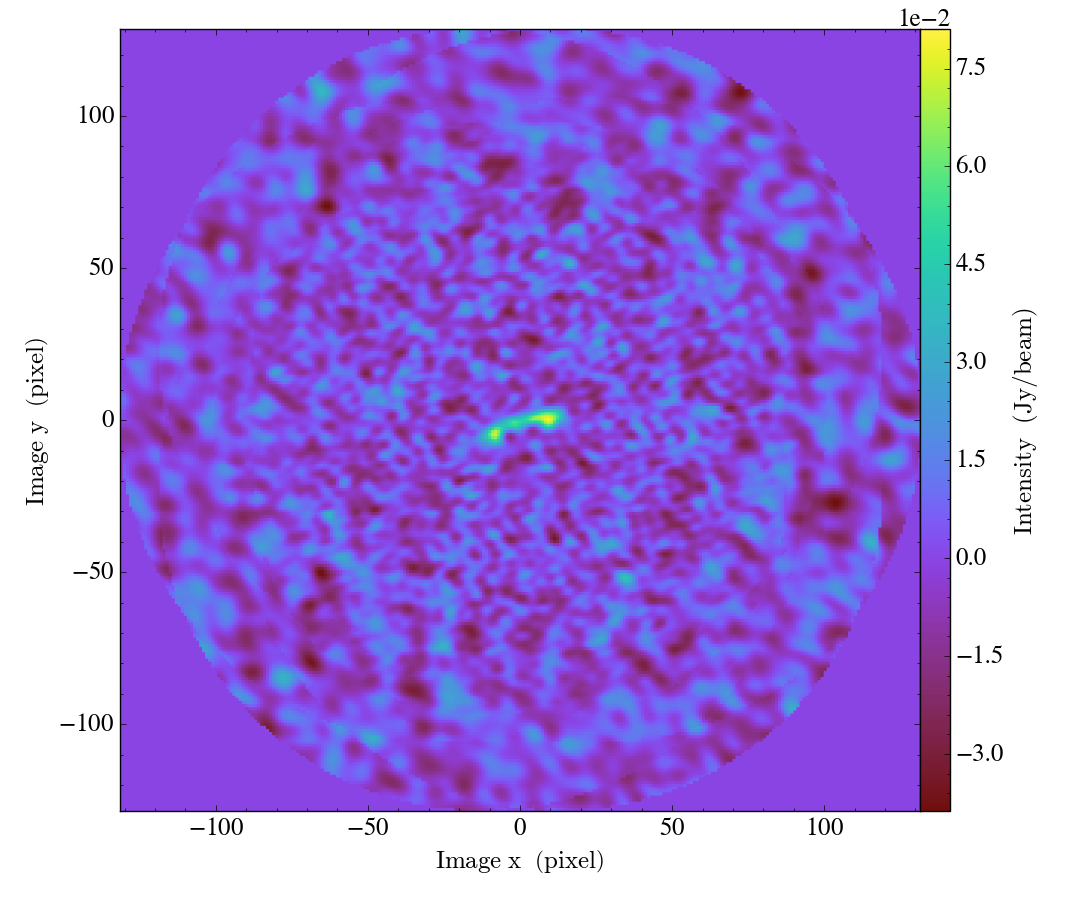

In [21]:
@interact(coord = (0.5, 263.5))
def plot_slice(coord = 0.5):
    c = ds.domain_center.copy()
    c[2] = coord
    p = yt.SlicePlot(ds, "z", "intensity", center = c)
    p.show()

In [24]:
ds.field_list

[('fits', 'intensity')]

In [25]:
p = yt.SlicePlot(ds, "positive_intensity",)

{'BITPIX': -32,
 'BLANK': -1,
 'BMAJ': 0.00135555572342,
 'BMIN': 0.00108333339449,
 'BPA': 55.2999992371,
 'BSCALE': 1.0,
 'BTYPE': 'intensity',
 'BUNIT': 'JY/BEAM',
 'BZERO': 0.0,
 'CDELT1': -0.000277777788364,
 'CDELT2': 0.000277777788364,
 'CDELT3': 20000.0,
 'CDELT4': 1.0,
 'CELLSCAL': '1/F',
 'CRPIX1': 132.0,
 'CRPIX2': 129.0,
 'CRPIX3': 1.0,
 'CRPIX4': 1.0,
 'CRVAL1': 216.868333333,
 'CRVAL2': 46.1465833333,
 'CRVAL3': 1880000.0,
 'CRVAL4': 1.0,
 'CTYPE1': 'RA---SIN',
 'CTYPE2': 'DEC--SIN',
 'CTYPE3': 'VELO-LSR',
 'CTYPE4': 'STOKES',
 'DATE': '2016-06-09',
 'DATE-OBS': '2014-12-24T13:57:46.9',
 'DVHEL': -14.2084999084,
 'EPOCH': 2000.0,
 'EXTEND': True,
 'HISTORY': 'FITS: NOTE: Use options=varwt if loading into Miriad',
 'LSTART': 1880.0,
 'LSTEP': 20.0,
 'LTYPE': 'velocity',
 'LWIDTH': 20.0,
 'NAXIS': 4,
 'NAXIS1': 263,
 'NAXIS2': 257,
 'NAXIS3': 44,
 'NAXIS4': 1,
 'NITERS': 129,
 'OBJECT': 'NGC5633',
 'OBSDEC': 46.1403437083,
 'OBSRA': 216.863133471,
 'ORIGIN': 'Miriad fits: C